In [13]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "house_price.csv"
df = pd.read_csv(file_path)

In [14]:
# Q1. Perform basic EDA 
print("basic EDA\n :")
print("Dataset Info:")
df.info()

print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

print("\nMissing Values Check:")
print(df.isnull().sum())

print("\nFirst 5 Rows of the Dataset:")
print(df.head())


basic EDA
 :
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB

Statistical Summary of Numerical Columns:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.

In [15]:
#Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using
"""
a) Mean and Standard deviation
b)Percentile method
c) IQR(Inter quartile range method)
d) Z Score method"""

print("""Outliers using :-
    A) Mean and Standard Deviation Method
    B) Percentile method
    C) IQR(Inter quartile range method)
    D) Z Score method""")

# A) Mean and Standard Deviation Method
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers_mean_std = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]
print("\nOutliers detected using Mean & Standard Deviation:", outliers_mean_std.shape[0])

# Removing outliers
df_cleaned_mean_std = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


# B) Percentile Method (5% and 95% thresholds)
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

outliers_percentile = df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]
print("Outliers detected using Percentile Method:", outliers_percentile.shape[0])

# Removing outliers
df_cleaned_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]


# C) IQR Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df['price_per_sqft'] < lower_bound_iqr) | (df['price_per_sqft'] > upper_bound_iqr)]
print("Outliers detected using IQR Method:", outliers_iqr.shape[0])

# Removing outliers
df_cleaned_iqr = df[(df['price_per_sqft'] >= lower_bound_iqr) & (df['price_per_sqft'] <= upper_bound_iqr)]


# D) Z-Score Method
df['z_score'] = zscore(df['price_per_sqft'])
outliers_zscore = df[(df['z_score'] < -3) | (df['z_score'] > 3)]
print("Outliers detected using Z-Score Method:", outliers_zscore.shape[0])

# Removing outliers
df_cleaned_zscore = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]

# Dropping the temporary z-score column after filtering
df_cleaned_zscore = df_cleaned_zscore.drop(columns=['z_score'])


Outliers using :-
    A) Mean and Standard Deviation Method
    B) Percentile method
    C) IQR(Inter quartile range method)
    D) Z Score method

Outliers detected using Mean & Standard Deviation: 5
Outliers detected using Percentile Method: 1320
Outliers detected using IQR Method: 1265
Outliers detected using Z-Score Method: 5


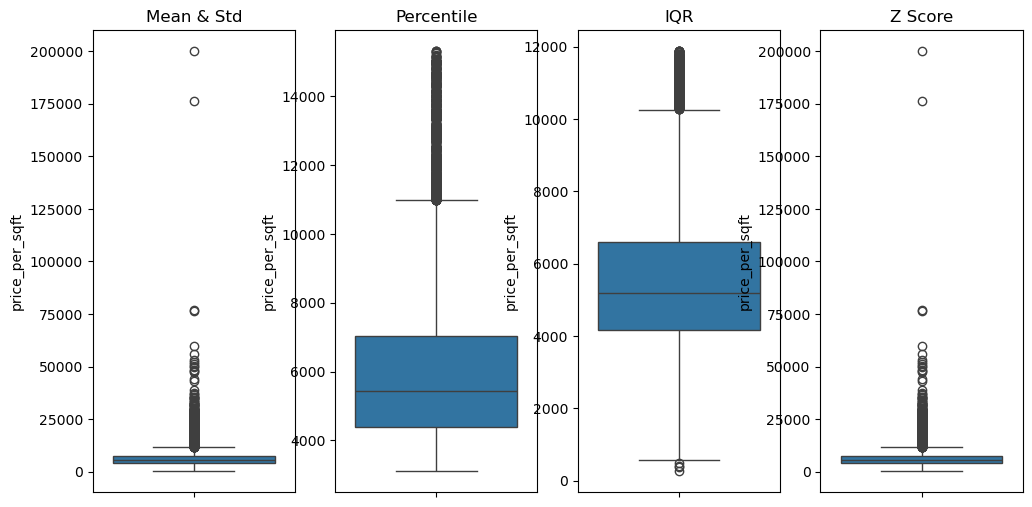

In [16]:
#Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? (Score:1)

# Box plot to compare methods
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
sns.boxplot(df_cleaned_mean_std['price_per_sqft'])
plt.title('Mean & Std')

plt.subplot(1, 4, 2)
sns.boxplot(df_cleaned_percentile['price_per_sqft'])
plt.title('Percentile')

plt.subplot(1, 4, 3)
sns.boxplot(df_cleaned_iqr['price_per_sqft'])
plt.title('IQR')

plt.subplot(1, 4, 4)
sns.boxplot(df_cleaned_zscore['price_per_sqft'])
plt.title('Z Score')

plt.show()



Skewness before transformation: 108.28105529705168
Kurtosis before transformation: 12095.21502832288
Skewness after transformation: 1.3998626551353
Kurtosis after transformation: 9.203576429862675


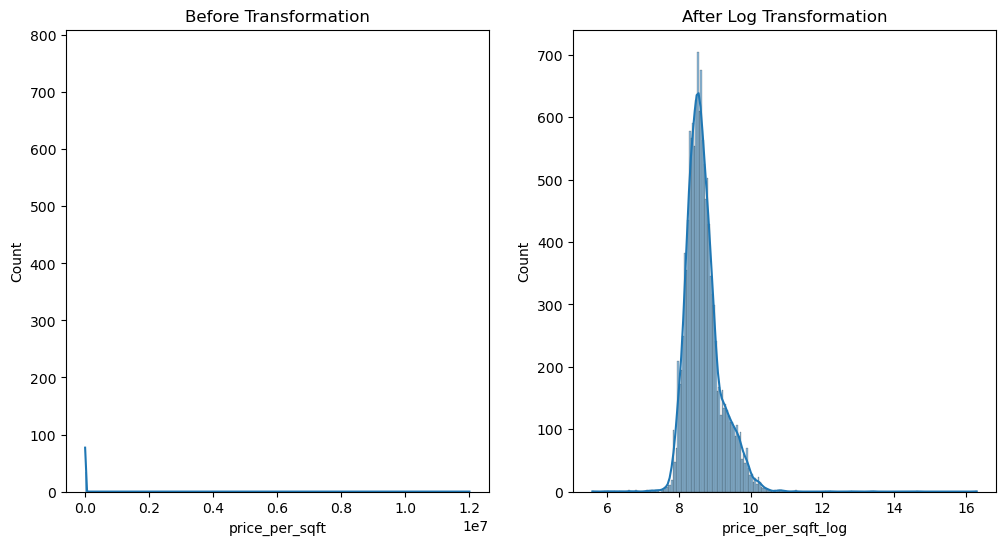

In [17]:
#Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed.
# Check the skewness and kurtosis before and after the transformation.


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Before Transformation')

# Check skewness and kurtosis
print("\nSkewness before transformation:", df['price_per_sqft'].skew())
print("Kurtosis before transformation:", df['price_per_sqft'].kurt())

# Apply log transformation
df['price_per_sqft_log'] = np.log(df['price_per_sqft'])

# Histplot after transformation
plt.subplot(1, 2, 2)
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title('After Log Transformation')

# Check skewness and kurtosis after transformation
print("Skewness after transformation:", df['price_per_sqft_log'].skew())
print("Kurtosis after transformation:", df['price_per_sqft_log'].kurt())

plt.show()

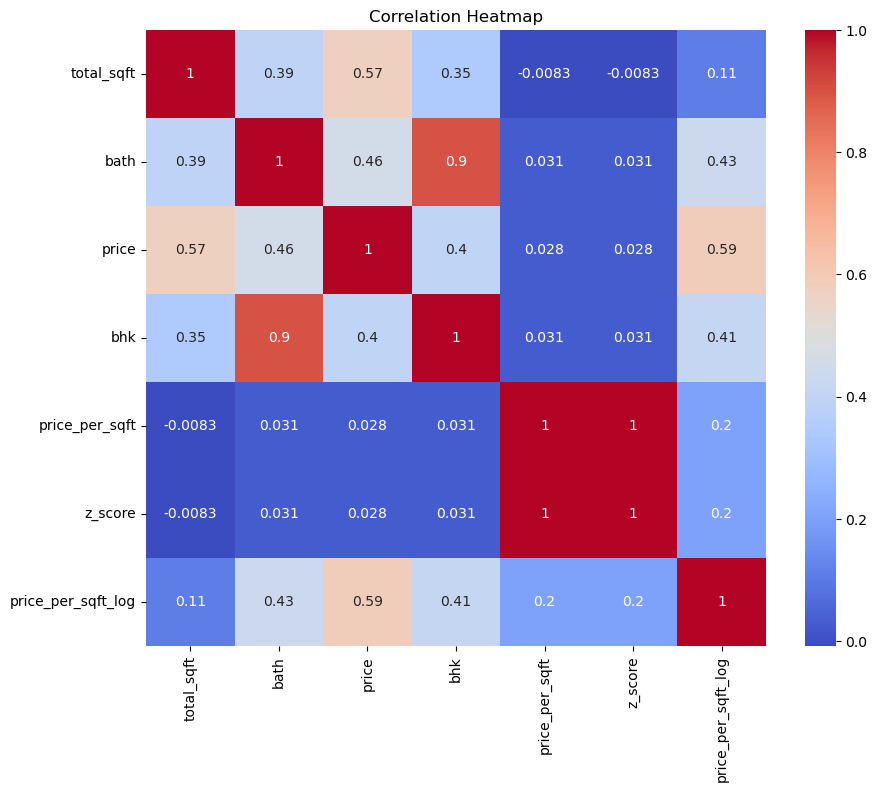

In [18]:

#Q5. Check the correlation between all the numerical columns and plot heatmap.


numerical_columns = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

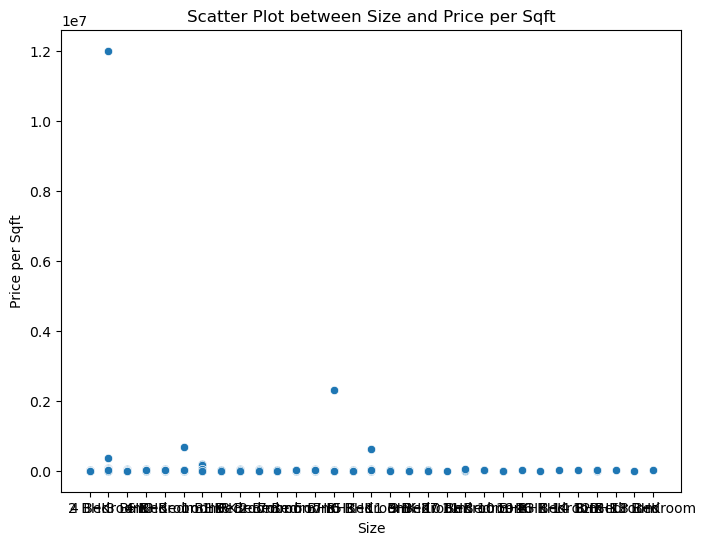

In [12]:
# Q6. Draw Scatter plot between the variables to check the correlation between them.

# Scatter plot between size and price_per_sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='size', y='price_per_sqft', data=df)
plt.title('Scatter Plot between Size and Price per Sqft')
plt.xlabel('Size')
plt.ylabel('Price per Sqft')
plt.show()